# Day 3: 공공데이터 분석

## 1. 인구데이터 분석

### 1-1. 우리 동네의 연령별 인구분포는 어떻게 될까?

In [1]:
#데이터 가져오기
f=open('./data/age_stats.csv','r')
import csv
data=csv.reader(f)
result=[]
header=next(data)
town=input('인구 구조가 궁금한 동(읍면동 단위) 입력 : ')
for row in data :
    if town in row[0]:
        for i in row[3:] :
             result.append(int(i))
#print(result)
f.close()
#데이터 시각화 하기
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.title(town+'의 연령별 인구분포')
plt.grid()
plt.xlabel('연령')
plt.ylabel('인구수')
plt.xlim(0,100) #x축의 데이터: 0~100
x_tick=[]
for i in range(0,101,10) : #x축 tick값을 0~100까지 10단위로 
    x_tick.append(i)
plt.xticks(ticks=x_tick)
plt.plot(result)
plt.show()

인구 구조가 궁금한 동(읍면동 단위) 입력 : 청운효자동


<Figure size 640x480 with 1 Axes>

### 1-2. 대치동 vs. 중계동?  비교하고 싶은 2개 동네의 인구 분포를 그리자

인구 구조가 궁금한 첫번째 동(읍면동 단위) 입력 : 청운효자동
인구 구조가 궁금한 두번째 동(읍면동 단위) 입력 : 합정동


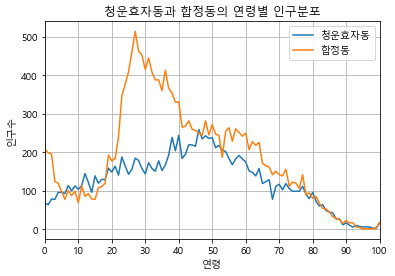

In [2]:
#데이터 가져오기
f=open('./data/age_stats.csv','r')
import csv
data=csv.reader(f)
result1=[]
result2=[]
header=next(data)
town1=input('인구 구조가 궁금한 첫번째 동(읍면동 단위) 입력 : ')
town2=input('인구 구조가 궁금한 두번째 동(읍면동 단위) 입력 : ')
for row in data :
    if town1 in row[0]:
        for i in row[3:] :
             result1.append(int(i))
    if town2 in row[0]:
        for i in row[3:] :
             result2.append(int(i))
f.close()
#데이터 시각화 하기
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.title(town1+'과 '+town2+'의 연령별 인구분포')
plt.grid()
plt.xlabel('연령')
plt.ylabel('인구수')
plt.xlim(0,100) #x축의 데이터
x_tick=[]
for i in range(0,101,10) : 
    x_tick.append(i)
plt.xticks(ticks=x_tick)#x축의 tick 설정
plt.plot(result1,label=town1)
plt.plot(result2,label=town2)
plt.legend()
plt.show()

### 1-3. 제주도에는 진짜 여자가 남자보다 많을까?

### [1-3-시도1] 선 그래프 그리기

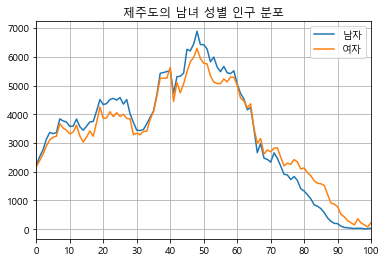

In [5]:
#데이터 불러오기
f=open('./data/gender_age_stats.csv','r')
import csv
data=csv.reader(f)
city='제주특별자치도'
male=[]
female=[]
for row in data :
    if city in row[0] :
        for i in row[3:104] :
            male.append(int(i))
        for i in row[106:] :
            female.append(int(i))
        break
f.close()
#print(len(male))
#print(len(female))
#데이터 시각화 하기
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic' #한글처리
plt.rcParams['axes.unicode_minus']=False #마이너스 문제 처리
plt.plot(male,label='남자')
plt.plot(female,label='여자')
plt.title('제주도의 남녀 성별 인구 분포')
plt.legend()
plt.grid()
plt.xlim(0,100)
x_tick=[]
for i in range(0,101,10) : 
    x_tick.append(i)
plt.xticks(ticks=x_tick)
plt.show()

### [1-3-시도2] 파이 그래프 그리기

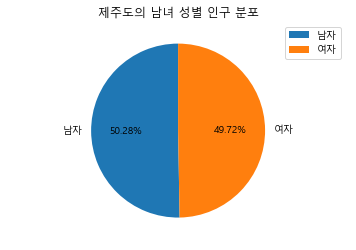

In [7]:
#데이터 불러오기
f=open('./data/gender_age_stats.csv','r')
import csv
data=csv.reader(f)
city='제주특별자치도'
total=[]
male=0
female=0
for row in data :
    if city in row[0] :
        for i in row[3:104] :
            male+=int(i)
        for i in row[106:] :
            female+=int(i)
        break
f.close()
# print(male)
# print(female)
total.append(male)
total.append(female)
#데이터 시각화 하기
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic' #한글처리
plt.axis('equal') #원그래프를 정원으로 설정
plt.pie(total,labels=['남자','여자'],autopct='%.2f%%',startangle=90)
plt.title('제주도의 남녀 성별 인구 분포')
plt.legend()
plt.show()

### [1-3-시도3] 수평바를 이용한 항아리모양 그래프 그리기

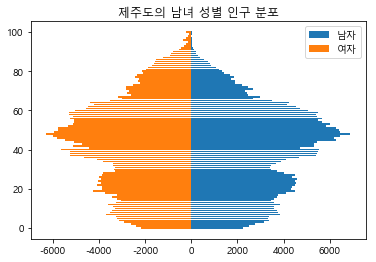

In [8]:
#데이터 불러오기
f=open('./data/gender_age_stats.csv','r')
import csv
data=csv.reader(f)
city='제주특별자치도'
male=[]
female=[]
for row in data :
    if city in row[0] :
        for i in row[3:104] :
            male.append(int(i))
        for i in row[106:] :
            female.append(-int(i)) #음의 방향 출력
        break 
f.close()
#print(len(male))
#print(len(female))
#데이터 시각화 하기
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic' #한글처리
plt.rcParams['axes.unicode_minus']=False #마이너스 문제 처리
plt.barh(range(101),male,label='남자')
plt.barh(range(101),female,label='여자')
plt.title('제주도의 남녀 성별 인구 분포')
plt.legend()
plt.show()

## 2. 지하철 데이터 분석

### 1-1. 출근 시간에 사람들이 가장 많이 타고 내리는 역은 어디일까?
### [시도1] 아침 7시의 데이터 그래프로 표현해 보기

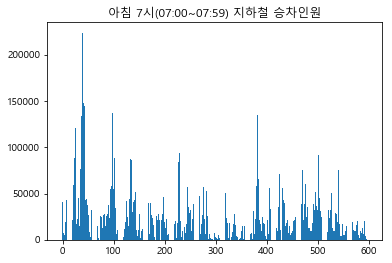

In [9]:
#데이터 가져오기
f=open('./data/subway.csv','r')
import csv
data=csv.reader(f)
next(data)
next(data)
result=[]
for row in data :
    row[4:]=map(int,row[4:]) #5번째 데이터 부터 모두 정수로 변환
    result.append(row[10])
              
# print(len(result))#결과확인
# print(result)#결과확인
f.close()
#데이터 시각화 : 그래프로 표현하기
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.bar(range(len(result)),result)
plt.title("아침 7시(07:00~07:59) 지하철 승차인원")
plt.show()

### [시도2] 아침 7시~9시(출근시간대)의 데이터 그래프로 표현해 보기

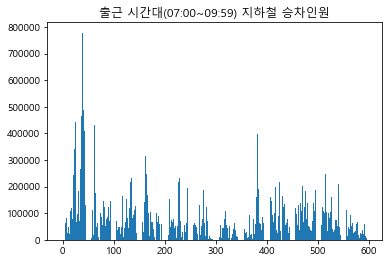

In [10]:
#데이터 가져오기
f=open('./data/subway.csv','r')
import csv
data=csv.reader(f)
next(data)
next(data)
result=[]
for row in data :
    row[4:]=map(int,row[4:]) #5번째 데이터 부터 모두 정수로 변환
    result.append(sum(row[10:15:2])) #10번, 12번, 14번 데이터 합치기
              
# print(len(result))#결과확인
# print(result)#결과확인
f.close()
#데이터 시각화 : 그래프로 표현하기
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.bar(range(len(result)),result)
plt.title("출근 시간대(07:00~09:59) 지하철 승차인원")
plt.show()

### [시도3] 아침 7시~9시(출근시간대)의 승차인원 데이터 최대값 찾기

7~9시 최대 승차인원역:  신림 (승차인원 : 778970 )


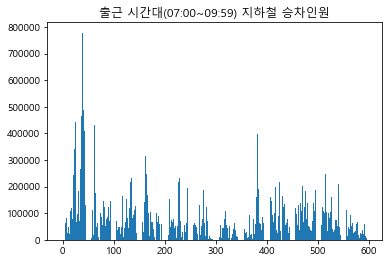

In [14]:
#데이터 가져오기
f=open('./data/subway.csv','r')
import csv
data=csv.reader(f)
next(data)
next(data)
result=[]
max=0 #최대값 저장
mx_station=''#최대값을 가진 지하철역 저장 :row[3]
for row in data :
    row[4:]=map(int,row[4:]) #5번째 데이터 부터 모두 정수로 변환
    sumValue=sum(row[10:15:2])
    result.append(sumValue) #10번, 12번, 14번 데이터 합치기
    if(max<sumValue) :
        max=sumValue
        mx_station=row[3]
print("7~9시 최대 승차인원역: ",mx_station,"(승차인원 :",max,")")        
# print(len(result))#결과확인
# print(result)#결과확인
f.close()
#데이터 시각화 : 그래프로 표현하기
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.bar(range(len(result)),result)
plt.title("출근 시간대(07:00~09:59) 지하철 승차인원")
plt.show()

### [시도4] 아침 7시~9시(출근시간대)의 하차 인원 데이터 최대값 찾기

7~9시 최대 하차인원역:  강남 (하차인원 : 850106 )


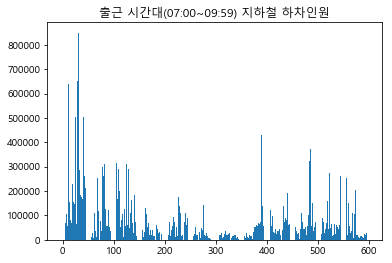

In [16]:
#데이터 가져오기
f=open('./data/subway.csv','r')
import csv
data=csv.reader(f)
next(data)
next(data)
result=[]
max=0 #최대값 저장
mx_station=''#최대값을 가진 지하철역 저장 :row[3]
for row in data :
    row[4:]=map(int,row[4:]) #5번째 데이터 부터 모두 정수로 변환
    sumValue=sum(row[11:16:2])
    result.append(sumValue) 
    if(max<sumValue) :
        max=sumValue
        mx_station=row[3]
print("7~9시 최대 하차인원역: ",mx_station,"(하차인원 :",max,")")        
# print(len(result))#결과확인
# print(result)#결과확인
f.close()
#데이터 시각화 : 그래프로 표현하기
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.bar(range(len(result)),result)
plt.title("출근 시간대(07:00~09:59) 지하철 하차인원")
plt.show()

### [참고] 사용자가 입력한 역의 시간대별 승하차 인원

지하철역명을 입력하세요 : 강남


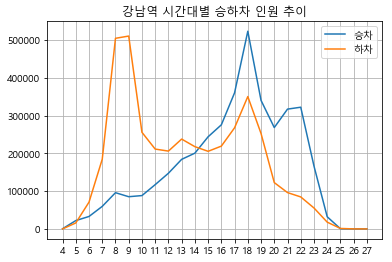

In [10]:
#데이터 가져오기
f=open('./data/subway.csv','r')
import csv
data=csv.reader(f)
next(data)
next(data)
result=[]
station=input("지하철역명을 입력하세요 : ")
s_in=[0]*24 #승차인원
s_out=[0]*24 #하차인원
for row in data :
    row[4:]=map(int,row[4:]) #5번째 데이터 부터 모두 정수로 변환
    if station in row[3] :
        for i in range(24) :
            s_in[i]+=row[4+i*2] #인덱스와 변수 사이의 관계식 찾기
            s_out[i]+=row[5+i*2]
    

f.close()

import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.title(station+'역 시간대별 승하차 인원 추이')
plt.plot(s_in,label='승차') #승차인원 선 그래프
plt.plot(s_out,label='하차') #하차인원 선 그래프
plt.xticks(range(24),range(4,28))
plt.grid()
plt.legend()
plt.show()